### Goal
- try on data shared on 20 Dec 23 what would be the sample size needed to have a good statistical power 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import math
import numpy as np

from statsmodels.stats.power import TTestIndPower
from statistics import mean, stdev
from math import sqrt
from matplotlib import pyplot as plt

sys.path.append('../')
import helper as hp

In [3]:
savepath = "A02_statistical_power/"
os.makedirs(savepath, exist_ok=True)

let's first find the Cohen’s d (effect) based on the data

In [4]:
k18 = [41.694,
56.693,
36.574,
44.631,
51.886,
20.624,
32.529,
33.967,
33.827,
23.949]

virgin_phos_negc = [89.812,
69.488,
64.119,
45.999,
59.911,
54.517,
45.555,
48.046,
54.625,
65.623]

sholigo = [40.834,
19.121,
35.234,
32.316,
52.449,
55.278,
33.672]

olaplex = [35.519,
19.686,
40.038,
33.379,
56.54,
56.816,
45.522,
55.58,
38.733]

In [5]:
def get_sample_size(list1, list2, alpha=0.05, power=0.8):
    cohens_d = (mean(list1) - mean(list2)) / (sqrt((stdev(list1) ** 2 + stdev(list2) ** 2) / 2))
    analysis = TTestIndPower()
    result = analysis.solve_power(cohens_d, power=power, nobs1=None, ratio=1.0, alpha=alpha)
    print('Sample Size: %.3f' % result)

In [6]:
get_sample_size(k18, virgin_phos_negc)

Sample Size: 6.107


In [7]:
get_sample_size(sholigo, k18)

Sample Size: 3690.828


In [8]:
get_sample_size(virgin_phos_negc, k18)

Sample Size: 6.107


In [9]:
get_sample_size(sholigo, virgin_phos_negc)

Sample Size: 6.896


In [10]:
get_sample_size(k18, olaplex)

Sample Size: 99.009


In [11]:
get_sample_size(sholigo, olaplex)

Sample Size: 153.217


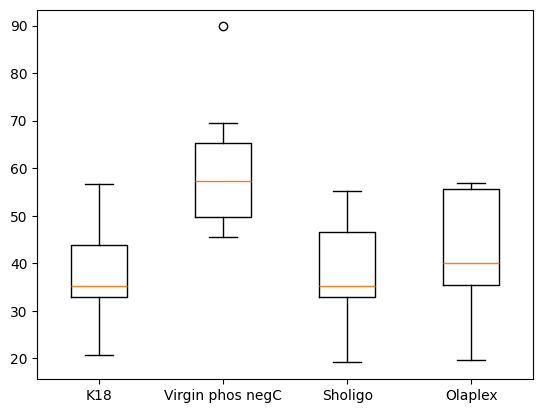

In [12]:
fig = plt.boxplot([k18, virgin_phos_negc, sholigo, olaplex], labels=['K18', 'Virgin phos negC', 'Sholigo', 'Olaplex'])

In [13]:
print(round(np.std(k18), 3))
print(round(np.std(virgin_phos_negc), 3))
print(round(np.std(sholigo), 3))
print(round(np.std(olaplex), 3))

10.787
12.78
11.522
11.808
